In [42]:
import numpy as np
import sys
import os
import pprint
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import yaml
import seaborn as sns

sns.set_style("ticks")
from matplotlib import rcParams
rcParams["legend.frameon"] = False



with open('save_path.yaml') as f:
    save_paths = yaml.load(f)

data_folder_base  = os.path.join(save_paths.get('data_path',''))

## Set up color stuff

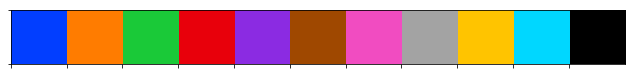

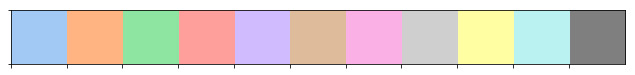

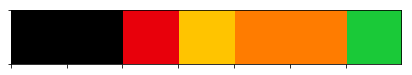

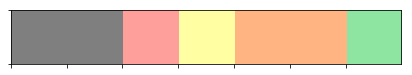

In [8]:
# Set the color base palette
raw_palette=sns.color_palette('bright')
raw_palette.append((0,0,0)) #append black
sns.palplot(raw_palette)


raw_palette_secondary=sns.color_palette('pastel')
raw_palette_secondary.append((0.5,0.5,0.5)) #append grey
sns.palplot(raw_palette_secondary)


# Set the colors and line types for the plots
colors = [10,10,3,8,1,1,2]

# generate the actual color palette and line type cycler to use
palette_main = []
palette_sec = []
for color in colors:
    palette_main.append(raw_palette[color])
    palette_sec.append(raw_palette_secondary[color])

sns.palplot(palette_main)
sns.palplot(palette_sec)

## Set up settings

In [101]:
group_names = ["Cyl1","Cyl2","Box", "Foam", "Muf1", "Muf2", "Broc"]
num_gait_cycles = 20

file_names = ['ihm_rot_gait_orangecup2_Trajectories_500', 
              'ihm_rot_gait_yellowcup_Trajectories_500',
              'ihm_rot_gait_box_3_Trajectories_500',
              'ihm_rot_gait_foam_3_Trajectories_500']


## Define some functions

In [102]:
def plot_all(data,file_idx):
    # plot the points in 3D and in 2D
    number_of_markers=data/3
    fig = plt.figure(1+file_idx*2)
    ax = fig.add_subplot(111, projection='3d')

    for mark_idx in range(number_of_markers):
        ax.plot(data[:,0+mark_idx*3],
                 data[:,1+mark_idx*3],
                 data[:,2+mark_idx*3])
    plt.show()

    fig2 = plt.figure(2+file_idx*2)
    plt.plot(data)
    plt.show()
    
def calculate_xy_angle(pos_a, pos_b):
    diff = pos_b - pos_a
    angle_raw = np.arctan2(diff[:,1], diff[:,0])
    angle_rad = np.unwrap(angle_raw, discont=np.pi/2)
    angle = np.rad2deg(angle_rad)

    return angle - angle[0]

## Get the data

In [103]:
raw_data_all = []
for file_name in file_names:
    full_filename = os.path.join(data_folder_base,file_name+'_fixed.pkl')
    with open(full_filename) as f:
        raw_data = pickle.load(f)
    
    raw_data_all.append(raw_data)

## Calculate rotations from the data

125.252465555
75.5075594994
86.2889421736
59.6097308521


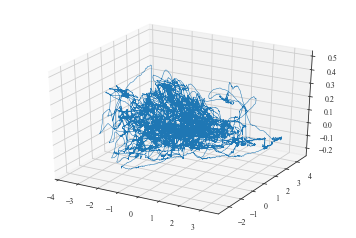

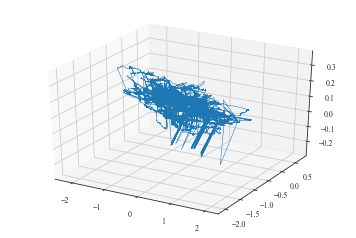

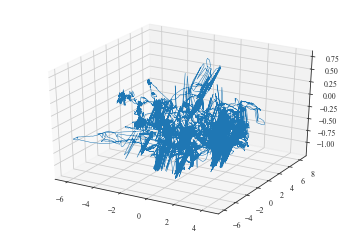

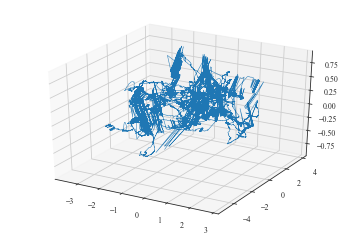

In [104]:
stats_all = []

for data_curr in raw_data_all:
    # get the two positions
    pos = np.array(data_curr['position'])
    time = np.array(data_curr['time'])
    pos_a = pos[:,0:3] /10.0
    pos_b = pos[:,3:6] /10.0

    pos_cm = (pos_a + pos_b)/2.0
    
    pos_cm_rel = pos_cm[2000:,:]- pos_cm[-1,:]
    
    max_cm_pos = np.max(pos_cm_rel,axis=0)
    
    angle = calculate_xy_angle(pos_a, pos_b)    
    angle_per_cycle = angle[-1]/ float(num_gait_cycles)
    
    stats = dict()
    stats['pos_cm_rel'] = pos_cm_rel
    stats['angle']      = angle
    
    stats['num_gait_cycles'] = num_gait_cycles
    stats['max_cm_pos'] = max_cm_pos
    stats['angle_per_cycle'] = angle_per_cycle

    stats_all.append(stats)
    print(angle_per_cycle)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.plot(pos_cm_rel[:,0],pos_cm_rel[:,1],pos_cm_rel[:,2])



In [105]:
max_dev = []
angle_per_cycle = []
for curr_stats in stats_all:
    max_dev.append(curr_stats['max_cm_pos'].tolist())
    angle_per_cycle.append(curr_stats['angle_per_cycle'])
    
print(max_dev)
print(angle_per_cycle)

max_dev = np.array(max_dev)

[[3.3258150000000013, 4.380659999999999, 0.5223999999999975], [2.0831000000000004, 0.7128499999999995, 0.3755999999999915], [4.404169999999999, 8.235670999999996, 0.8173499999999905], [2.7507384999999998, 3.7858149999999995, 0.9211999999999989]]
[125.2524655553315, 75.507559499440873, 86.288942173643889, 59.609730852067841]


## Make the main bar graph

In [106]:
palettes_to_use = [palette_main,palette_sec, palette_sec]
axis_units   = ['Deg.','mm']

sns.set_style("ticks")

plt.rc('font', family='Times New Roman')
plt.rc('lines', linewidth=0.5)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

def save_figure(file_name,fig_to_make):
    plt.savefig(os.path.join(data_folder_base,
        file_name+'_'+fig_to_make+'_all.svg'))
    plt.savefig(os.path.join(data_folder_base,
        file_name+'_'+fig_to_make+'_all.png'))

4
[-1.2 -0.4  0.4  1.2]


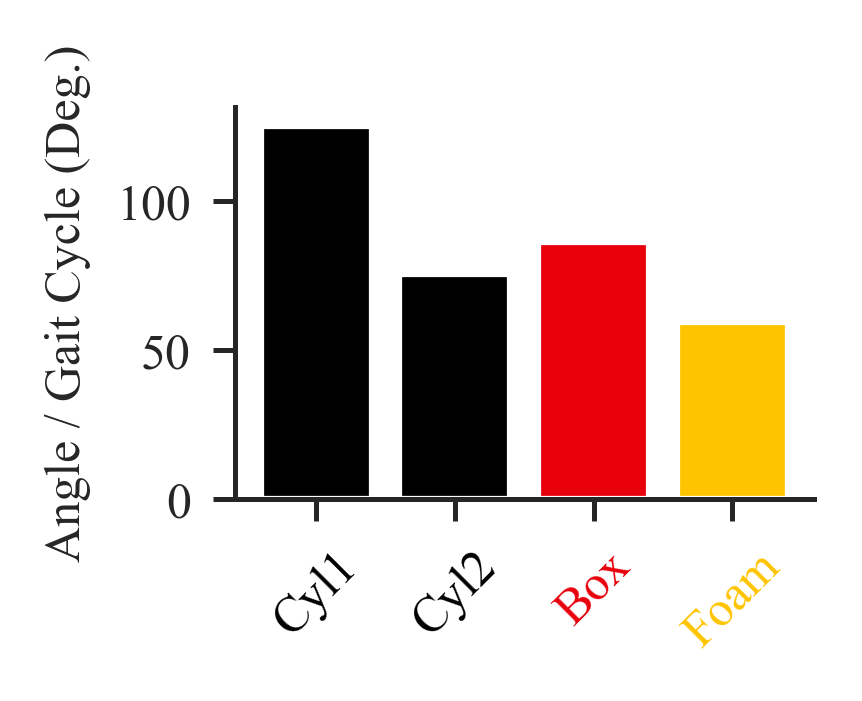

In [107]:


fig_idx = 0
num_categories= 1
max_bars = len(angle_per_cycle)


fig = plt.figure( figsize=(3.48/2, 1.3), dpi=450)
ax=plt.gca()

x = np.arange(max_bars)  # the label locations
width = 0.8/(num_categories)       # the width of the bars

for i in range(num_categories):
    N_bars = len(angle_per_cycle)
    print(N_bars)
    offsets = np.linspace(0, (N_bars-1)*width, N_bars)
    offsets -= offsets.mean()
    print(offsets)
    a = ax.bar(x+width*i, angle_per_cycle, width=width, color=palettes_to_use[i])

ax.set_xticks(x + (width /2)*num_categories)
ax.set_xticklabels(group_names, rotation=45)

for xtick, color in zip(ax.get_xticklabels(), palettes_to_use[0]):
    xtick.set_color(color)

sns.despine()
plt.ylabel('Angle per Gait Cycle ('+axis_units[fig_idx]+')')
fig.subplots_adjust(left=0.25, bottom=.25, right=.99, top=.92)

save_figure('angle_per_cycle','')

## Make the deviation graph

4
[-0.6 -0.2  0.2  0.6]
4
[-0.6 -0.2  0.2  0.6]


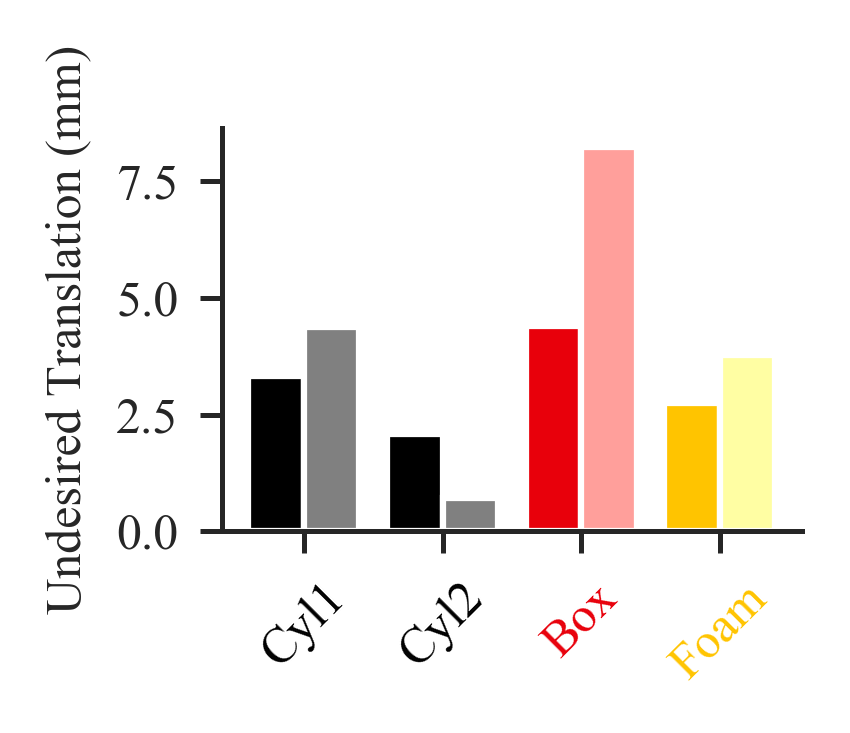

In [110]:
max_dev_to_use = max_dev[:,0:2]

fig_idx = 1
num_categories= max_dev_to_use.shape[1]
max_bars = len(angle_per_cycle)

# Range
fig = plt.figure( figsize=(3.48/2, 1.3), dpi=450)
ax=plt.gca()

x = np.arange(max_bars)  # the label locations
width = 0.8/(num_categories)       # the width of the bars

for i in range(num_categories):
    N_bars = len(max_dev_to_use)
    print(N_bars)
    offsets = np.linspace(0, (N_bars-1)*width, N_bars)
    offsets -= offsets.mean()
    print(offsets)
    a = ax.bar(x+width*i, max_dev_to_use[:,i], width=width, color=palettes_to_use[i])

ax.set_xticks(x + (width /2)*num_categories)
ax.set_xticklabels(group_names, rotation=45)

for xtick, color in zip(ax.get_xticklabels(), palettes_to_use[0]):
    xtick.set_color(color)
sns.despine()
plt.ylabel('Undesired Translation ('+axis_units[fig_idx]+')')

fig.subplots_adjust(left=0.25, bottom=.25, right=.99, top=.94)

save_figure('deviation','')